# Hand Emojinator using Convolutional Neural Network (CNN) & OpenCV
- Emojis are ideograms and smileys used in electronic messages and web pages. Emoji exist in various genres, including facial expressions, common objects, places and types of weather, and animals. They are much like emoticons, but emoji are actual pictures instead of typographics.

- This project helps you to classify different hand gestures into its corresponding hand emoji to display on the video stream.

## 1. View sample Hand Emoji

In [23]:
# import openCV and matplotlib library
import matplotlib.pyplot as plt
import cv2

In [24]:
# read sample image and convert its color channel from BGR to RGB
img = cv2.imread('hand_emoji/train/Thumbs_Up/1f44d.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [25]:
# check datatype for the image
type(img)

numpy.ndarray

In [26]:
# check image shape
img.shape

(128, 128, 3)

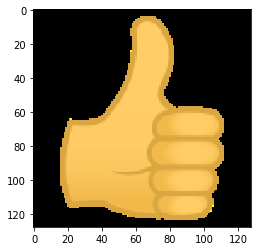

In [73]:
# view image
plt.imshow(img)

## 2. Data/Image augmentation

We do not have sufficient amount of data to train our image classification model, so we will be using data/image augmentation process which is available in Keras called [Image Data Generator](https://keras.io/preprocessing/image/#imagedatagenerator-class). Its usually a good idea to manipulate the images with rotation, resizing and scaling so the model becomes more robust to different images that our dataset doesn't have. This trick makes it seem like you have far more data than you actually have, resulting in better models.

In [32]:
# import image data generator library from Keras
from keras.preprocessing.image import ImageDataGenerator

In [14]:
# create image generator
image_gen = ImageDataGenerator(rotation_range=30,      # rotate the image upto 30 degrees
                               width_shift_range=0.1,  # shift the pic width upto 10%
                               height_shift_range=0.1, # shift the pic height upto 10%
                               shear_range=0.2,        # shear means cutting away part of the image upto 20%
                               zoom_range=0.2,         # zoom in by upto 20%
                               fill_mode='nearest',    # fill in missing pixels with the nearest filled value
                               horizontal_flip=True,   # allow horizontal flipping
                               rescale=1/255)          # rescale the image by normalzing it.

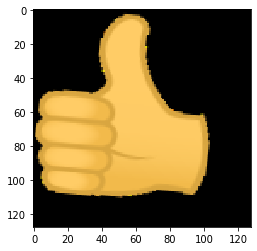

In [29]:
# check first random image
plt.imshow(image_gen.random_transform(img))

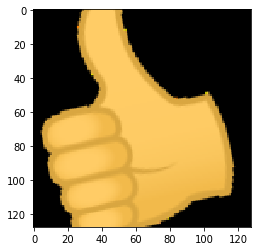

In [30]:
# check second random image
plt.imshow(image_gen.random_transform(img))

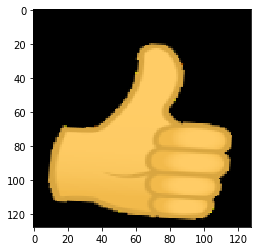

In [31]:
# check third random image
plt.imshow(image_gen.random_transform(img))

### Generating many manipulated images from a directory
In order to use .flow_from_directory, we must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:
- Image Data Folder
    - Class 1
        - 0.jpg
        - 1.jpg
        - ...
    - Class 2
        - 0.jpg
        - 1.jpg
        - ...
    - ...
    - Class n

In [4]:
# resiszing images to 150 pixels by 150 pixels and 3 color channels
input_shape = (150,150,3)

In [13]:
# generate train images from image generator
train_image_gen = image_gen.flow_from_directory('hand_emoji/train',
                                               target_size=input_shape[:2],
                                               batch_size=16,
                                               class_mode='categorical')

Found 198 images belonging to 16 classes.


In [14]:
# generate test images from image generator
test_image_gen = image_gen.flow_from_directory('hand_emoji/test',
                                               target_size=input_shape[:2],
                                               batch_size=16,
                                               class_mode='categorical')

Found 95 images belonging to 16 classes.


In [15]:
# check target labels
train_image_gen.class_indices

{'Call_Me': 0,
 'Down_Index': 1,
 'Fingers_Crossed': 2,
 'Fist': 3,
 'Hand': 4,
 'Middle_Finger': 5,
 'OK': 6,
 'Pointing_Index': 7,
 'Rock_It': 8,
 'Smack': 9,
 'Thumbs_Down': 10,
 'Thumbs_Up': 11,
 'Up_Pointing_Index': 12,
 'Victory_Hand': 13,
 'Vulcan_Salute': 14,
 'Yo': 15}

## 3. Building the [Convolutional Neural Network (CNN)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) model

There are four important steps in building Convolutional Neural Network (CNN)

__1. Convolution Layer__
    - The objective of Convolution operation is to extract high-level features such as edges from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data.


__2. Pooling Layer__
    - Pooling layer is responsible for reducing the spatial size of the Convolved Features. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training the model.
    - There are two types of Pooling :- Max Pooling and Average Pooling. Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel.
    - Max Pooling also works as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. On the other hand, Average Pooling simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.


__3. Flatten__
    - Flatten involves converting the image into a column vector i.e the matrix is converted into a linear array so as to input it into the nodes of our neural network.


__4. Fully Connected Layer__
    - Adding a Fully Connected layer is a way of learning non-linear combinations of high-level features as represented by the output of the convolutional layer.
    - Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them using the Softmax Classification technique.


![CNN](hand_emoji/CNN.jpeg)

In [2]:
# import keras models and layers libraries
from keras.models import Sequential
from keras.layers import Activation, Conv2D, Dense, Dropout, MaxPool2D, Flatten

In [11]:
# create a Sequential Model
model = Sequential()

# we use Convolution2D layer with 32 filters, kernel size of 3x3, input shape of (150, 150, 3), 
# Rectified Linear Unit as the activation function and max pooling 2D layer with pool size of 2x2
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution2D layer with 64 filters
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution2D layer with 128 filters
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution2D layer with 256 filters
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution2D layer with 512 filters
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# flatten the matrix into a linear array
model.add(Flatten())

# add a fully connected dense layer with 128 units and Rectified Linear Unit as the activation function
model.add(Dense(128, activation='relu'))

# add dropout which will avoid overfitting by turning off 40% of the neurons
model.add(Dropout(0.4))

# add a dense layer with 16 units i.e equal to # of target labels and softmax as the activation function for classification
model.add(Dense(16, activation='softmax'))

# compile the model using categorical crossentropy & adam optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# check out model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 256)       295168    
__________

### [Fit Generator Keras Documenation](https://keras.io/models/model/#fit_generator)

In [16]:
# fit the model on training data and validate against test data
model.fit_generator(train_image_gen,                # training data
                    epochs=300,                     # 300 epochs. An epoch is an iteration over the entire data provided
                    steps_per_epoch=198//16,        # Total number of steps (batches of samples) to yield from generator
                    validation_data=test_image_gen, # testing data
                    validation_steps=95//16)        # Total number of steps (batches of samples) to yield from validation_data

Epoch 1/300


C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


12/12 [==============================] - 8s 680ms/step - loss: 2.9141 - acc: 0.0729 - val_loss: 2.7850 - val_acc: 0.0500
Epoch 2/300
12/12 [==============================] - 6s 541ms/step - loss: 2.7799 - acc: 0.0366 - val_loss: 2.7642 - val_acc: 0.0886
Epoch 3/300
12/12 [==============================] - 7s 576ms/step - loss: 2.7601 - acc: 0.0865 - val_loss: 2.7526 - val_acc: 0.0506
Epoch 4/300
12/12 [==============================] - 7s 554ms/step - loss: 2.7633 - acc: 0.0628 - val_loss: 2.7509 - val_acc: 0.1139
Epoch 5/300
12/12 [==============================] - 7s 546ms/step - loss: 2.7559 - acc: 0.0366 - val_loss: 2.7794 - val_acc: 0.0633
Epoch 6/300
12/12 [==============================] - 7s 551ms/step - loss: 2.7245 - acc: 0.1443 - val_loss: 2.7149 - val_acc: 0.1646
Epoch 7/300
12/12 [==============================] - 7s 552ms/step - loss: 2.6913 - acc: 0.1440 - val_loss: 2.6534 - val_acc: 0.1500
Epoch 8/300
12/12 [==============================] - 7s 556ms/step - loss: 2.6306

12/12 [==============================] - 7s 621ms/step - loss: 0.5638 - acc: 0.8089 - val_loss: 1.2742 - val_acc: 0.6962
Epoch 124/300
12/12 [==============================] - 7s 615ms/step - loss: 0.6968 - acc: 0.7643 - val_loss: 0.9946 - val_acc: 0.7215
Epoch 125/300
12/12 [==============================] - 7s 617ms/step - loss: 0.6880 - acc: 0.7908 - val_loss: 0.9843 - val_acc: 0.7722
Epoch 126/300
12/12 [==============================] - 8s 634ms/step - loss: 0.5467 - acc: 0.8037 - val_loss: 1.2210 - val_acc: 0.7215
Epoch 127/300
12/12 [==============================] - 7s 623ms/step - loss: 0.7449 - acc: 0.7619 - val_loss: 1.0651 - val_acc: 0.7250
Epoch 128/300
12/12 [==============================] - 7s 597ms/step - loss: 0.6866 - acc: 0.7563 - val_loss: 1.0109 - val_acc: 0.7215
Epoch 129/300
12/12 [==============================] - 7s 622ms/step - loss: 0.5886 - acc: 0.8037 - val_loss: 1.1328 - val_acc: 0.7089
Epoch 130/300
12/12 [==============================] - 8s 661ms/step 

Epoch 184/300
12/12 [==============================] - 7s 572ms/step - loss: 0.5201 - acc: 0.8142 - val_loss: 0.9379 - val_acc: 0.7595
Epoch 185/300
12/12 [==============================] - 7s 577ms/step - loss: 0.4680 - acc: 0.8428 - val_loss: 1.1162 - val_acc: 0.7722
Epoch 186/300
12/12 [==============================] - 7s 573ms/step - loss: 0.3665 - acc: 0.8717 - val_loss: 1.3075 - val_acc: 0.7342
Epoch 187/300
12/12 [==============================] - 7s 570ms/step - loss: 0.5033 - acc: 0.8218 - val_loss: 1.2407 - val_acc: 0.8125
Epoch 188/300
12/12 [==============================] - 7s 572ms/step - loss: 0.3789 - acc: 0.8692 - val_loss: 0.8011 - val_acc: 0.8228
Epoch 189/300
12/12 [==============================] - 7s 566ms/step - loss: 0.3830 - acc: 0.8692 - val_loss: 1.4361 - val_acc: 0.7089
Epoch 190/300
12/12 [==============================] - 7s 571ms/step - loss: 0.4359 - acc: 0.8194 - val_loss: 1.2371 - val_acc: 0.7848
Epoch 191/300
12/12 [==============================] - 

Epoch 245/300
12/12 [==============================] - 7s 573ms/step - loss: 0.2733 - acc: 0.8978 - val_loss: 1.4719 - val_acc: 0.7468
Epoch 246/300
12/12 [==============================] - 7s 572ms/step - loss: 0.2628 - acc: 0.9031 - val_loss: 1.1366 - val_acc: 0.7722
Epoch 247/300
12/12 [==============================] - 7s 561ms/step - loss: 0.3397 - acc: 0.8745 - val_loss: 1.5368 - val_acc: 0.7625
Epoch 248/300
12/12 [==============================] - 7s 599ms/step - loss: 0.2982 - acc: 0.9115 - val_loss: 1.4040 - val_acc: 0.7722
Epoch 249/300
12/12 [==============================] - 7s 568ms/step - loss: 0.4185 - acc: 0.8637 - val_loss: 1.3180 - val_acc: 0.7975
Epoch 250/300
12/12 [==============================] - 7s 566ms/step - loss: 0.3721 - acc: 0.8902 - val_loss: 1.0720 - val_acc: 0.7722
Epoch 251/300
12/12 [==============================] - 7s 567ms/step - loss: 0.3915 - acc: 0.8902 - val_loss: 1.2246 - val_acc: 0.7468
Epoch 252/300
12/12 [==============================] - 

### We get an accuracy of 76% on test data. 

In [17]:
# save the model
model.save('hand_emoji_model.h5')

In [18]:
# save model weights
model.save_weights('hand_emoji_model_weights.h5')

Lets check our model prediction for a sample image which in this case is a __Thumbs Down Emoji__

In [16]:
# import numpy and keras image libraries
from keras.preprocessing import image
import numpy as np

In [17]:
# load the image and resize it to 150x150
td = image.load_img('hand_emoji/test/Thumbs_Down/reversed_thumbs_down_sign(p).png', target_size=(150,150))

In [18]:
# convert the image to an Numpy array
td = image.img_to_array(td)

In [19]:
# expand shape of the array
td = np.expand_dims(td,axis=0)

In [20]:
# predict class
model.predict_classes(td)

array([10], dtype=int64)

In [44]:
train_image_gen.class_indices

{'Call_Me': 0,
 'Down_Index': 1,
 'Fingers_Crossed': 2,
 'Fist': 3,
 'Hand': 4,
 'Middle_Finger': 5,
 'OK': 6,
 'Pointing_Index': 7,
 'Rock_It': 8,
 'Smack': 9,
 'Thumbs_Down': 10,
 'Thumbs_Up': 11,
 'Up_Pointing_Index': 12,
 'Victory_Hand': 13,
 'Vulcan_Salute': 14,
 'Yo': 15}

### Our model is able to accurately classify the image as a Thumbs Down Emoji which corresponds to number 10 in our class indices

In [22]:
# another variant to get prediction
model.predict(td)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)

## 4. Predict Hand Emojis from Hand Gestures for a Video Stream  
Our model is not able to accurately classify images when they are raw and unprocessed. We can process our images using OpenCV to get accurate classification. Below two methods can be used for processing the video frames.

1. [Canny Edge Detection](https://docs.opencv.org/3.4.2/da/d22/tutorial_py_canny.html)
    - Below is an example of Canny Edge Detection implementation for our hand emoji which is provided as an input to our CNN model. We see a bit of improvement in the classification but not by a considerable amount. Canny Edge Detection is good at detecting edges but at the expense losing fine details in the images.

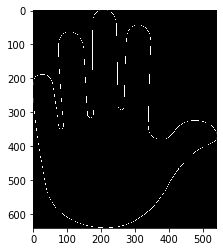

In [48]:
hand = cv2.imread('hand_emoji/train/Hand/Left_Hand.png',0)

#hand_blur = cv2.blur(hand, ksize=(3,3))

hand_edge = cv2.Canny(hand, int(max(0,0.7 * np.median(hand))), int(min(255,1.3 * np.median(hand))))

plt.imshow(hand_edge,cmap='gray')

2. [Morphological Gradient Transformation](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)
    - Morphological Gradient is the difference between dilation and erosion of an image. Our model performs quite well when the image is processed using Morphological Gradient as it preserves both high and low level details of the image.

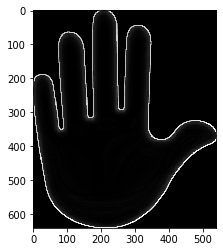

In [45]:
hand = cv2.imread('hand_emoji/train/Hand/Left_Hand.png',0)

hand_grad = cv2.morphologyEx(hand, cv2.MORPH_GRADIENT, kernel=np.ones((4,4),dtype=np.uint8))

plt.imshow(hand_grad,cmap='gray')

### [Blending Images in OpenCV using Arithmetic Operations](https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html)

In [1]:
# import libraries
import os
from keras.preprocessing import image
from keras.models import load_model
import cv2
import numpy as np
import glob

# load the model
model = load_model('hand_emoji_model.h5')

def model_predict(model, grad):
    ''' 
    Get prediction for hand gestures 
    '''   
    img = process_image(grad)
    predicted_class = model.predict_classes(img)[0]
    return predicted_class
    
def process_image(grad):
    ''' 
    Process the image 
    '''
    img = cv2.resize(grad,(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

def get_emoji(predicted_class):
    ''' 
    Get emoji from prediction 
    ''' 
    for i in glob.glob('hand_emoji/emoji/*'):
        if i[17:] == str(predicted_class)+'.png':
            emoji = cv2.imread(i)
            return emoji
    
def blend(frame_flip, emoji):
    ''' 
    Blend the predicted emoji onto the video capture frame 
    '''
    # define Region Of Interest (ROI)
    roi_upper_left = (180,200)
    roi_bottom_right = (450,500)
    roi = frame_flip[roi_upper_left[1]:roi_bottom_right[1], roi_upper_left[0]:roi_bottom_right[0]]   
    
    # resize the hand emoji
    emoji = cv2.resize(emoji,(roi_bottom_right[0] - roi_upper_left[0],roi_bottom_right[1] - roi_upper_left[1]))
    
    # create a mask of hand emoji and also its inverse mask
    emoji2gray = cv2.cvtColor(emoji, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(emoji2gray, 127, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    
    # black-out the area of hand emoji in ROI
    emoji_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
    
    # Grab only region of hand emoji from entire image
    emoji_fg = cv2.bitwise_and(emoji, emoji, mask=mask)
    
    # place the hand emoji in ROI on the video frame
    dst = cv2.add(emoji_bg, emoji_fg)
    frame_flip[roi_upper_left[1]:roi_bottom_right[1], roi_upper_left[0]:roi_bottom_right[0]] = dst
    
    return frame_flip

Using TensorFlow backend.


In [6]:
def main():
    
    # start video capture 
    cap = cv2.VideoCapture(0)
    
    # set video height and width
    cap.set(cv2.CAP_PROP_FRAME_WIDTH,1200)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT,800)
    
    # set co-ordinates for Region of Interest (ROI)
    upper_left = (800,200)
    bottom_right = (1100,500)

    while True:

        # read the video frames
        _, frame = cap.read(0)
    
        # flip the video frames   
        frame_flip = cv2.flip(frame,1)
        
        # set ROI to place our hand
        roi_img = frame_flip[upper_left[1]:bottom_right[1], upper_left[0]:bottom_right[0]]
        
        #blurred_roi = cv2.blur(roi_img, ksize=(3,3))
    
        #edges = cv2.Canny(blurred_roi, int(max(0,0.7 * np.median(roi_img))), int(min(255,1.3 * np.median(roi_img))))
        
        #edges_reshape = edges.reshape(150,150,3)
    
        # transform the raw hand image using Morphological Gradient
        grad = cv2.morphologyEx(roi_img, cv2.MORPH_GRADIENT, kernel=np.ones((5,5),dtype=np.uint8))
    
        # draw a red rectangle around ROI
        cv2.rectangle(frame_flip, upper_left, bottom_right, (0,0,255), 5)
        
        # predict hand emoji
        predicted_class = model_predict(model, grad)
        
        # get predicted hand emoji
        emoji = get_emoji(predicted_class)
        
        #print(predicted_class)
        
        # blend the hand emoji on the video stream
        blended = blend(frame_flip, emoji)
        
        #cv2.imshow('Grad', grad)
        
        #cv2.imshow('Emoji', cv2.resize(emoji,(300,300)))
    
        # show the predicted hand emoji on the video stream
        cv2.imshow('Video', blended)       
    
        # hit 'q' to stop the video stream
        if cv2.waitKey(30) & 0xff == ord('q'):
            break

    cap.release( )
    cv2.destroyAllWindows( )
    

if __name__ == '__main__':
    main()

## Hand Emojinator without Transfer Learning
![Hand Emojinator without Transfer Learning](hand_emoji/Not_Accurate_WO_TL_7_12_2019_6_52_04_PM.gif)

## 5. Transfer Learning
__1. What is Transfer Learning?__
    - Transfer learning, is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.


__2. Why Transfer Learning?__
    - In practice very few people train a Convolution Neural Network from scratch (random initialisation) because it is rare to get enough data. So, using pre-trained network weights as initialisations or a fixed feature extractor helps in solving most of the problems in hand.
    - Very Deep Networks are expensive to train. The most complex models take weeks to train using hundreds of machines equipped with expensive GPUs.


__3. How Transfer Learning helps ?__
    - When you look at what these Deep Learning networks learn, they try to detect edges in the earlier layers, Shapes in the middle layer and some high level data specific features in the later layers. These trained networks are generally helpful in solving other computer vision problems. Lets have a look at how to do transfer learning using Keras.
    
![Transfer_Learning](hand_emoji/Transfer_Learning.png)

#### VGG19 Model for Transfer Learning
- Documentation for various Keras pre-trained deep learning models which can be used for transfer learning is available [here](https://keras.io/applications/)
- For our usage case we will be using **VGG19** model which is a neural network developed and trained by Oxford's renowned Visual Geometry Group (VGG). The model performed very well in the Image Net Large Scale Visual Recognition Challenge (ILSVRC) in 2014. It scored first place on the image localization task and second place on the image classification task.
- Localization is finding where in the image a certain object is, described by a bounding box. Classification is describing what the object in the image is. This predicts a category label, such as “cat” or “bookcase”.
![VGG19](hand_emoji/VGG19.jpeg)

In [10]:
# import the VGG19 model
from keras.applications.vgg19 import VGG19

### conv_base
- weights='imagenet' :-  will download weights which was trained on imagenet dataset.
- include_top=False :-  <font color=red>do not download fully connected layer of the pre-trained model.</font> After the convolution layers extract basic features such as edges, blobs or lines from the input images, the fully connected layer then classifies them into categories. Since all we need is to classify 16 classes of our hand emojis, we are going to remove the former and add our own FC layer.
- input_shape=(150,150,3) :- specify our image input dimension

In [11]:
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [12]:
# checkout conv_base summary
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [13]:
# import keras models and layers libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [14]:
# create sequential model
model = Sequential()

# add our conv_base layer
model.add(conv_base)

# flatten the output from the conv_base as we pass it to our fully connected layer (classifier).
model.add(Flatten())

# add dropout which will avoid overfitting by turning off 40% of the neurons
model.add(Dropout(0.4))

# add a dense layer with 256 units and Rectified Linear Unit as the activation function
model.add(Dense(256, activation='relu'))

# add a dense layer with 16 units i.e equal to # of target labels and softmax as the activation function for classification
model.add(Dense(16, activation='softmax'))

In [15]:
# set conv_base layer's training to False as it is already trained
conv_base.trainable = False

In [16]:
# compile the model using categorical crossentropy & adam optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Remaining procedure is same as before

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1,
                               shear_range=0.2,
                               zoom_range=0.2, 
                               fill_mode='nearest', 
                               horizontal_flip=True, 
                               rescale=1/255)

In [19]:
input_shape = (150,150,3)

In [20]:
train_image_gen = image_gen.flow_from_directory('hand_emoji/train',
                                               target_size=input_shape[:2],
                                               batch_size=16,
                                               class_mode='categorical')

Found 198 images belonging to 16 classes.


In [21]:
test_image_gen = image_gen.flow_from_directory('hand_emoji/test',
                                               target_size=input_shape[:2],
                                               batch_size=16,
                                               class_mode='categorical')

Found 95 images belonging to 16 classes.


In [22]:
train_image_gen.class_indices

{'Call_Me': 0,
 'Down_Index': 1,
 'Fingers_Crossed': 2,
 'Fist': 3,
 'Hand': 4,
 'Middle_Finger': 5,
 'OK': 6,
 'Pointing_Index': 7,
 'Rock_It': 8,
 'Smack': 9,
 'Thumbs_Down': 10,
 'Thumbs_Up': 11,
 'Up_Pointing_Index': 12,
 'Victory_Hand': 13,
 'Vulcan_Salute': 14,
 'Yo': 15}

In [23]:
history = model.fit_generator(train_image_gen,
                              epochs=50,
                              steps_per_epoch=198//16,
                              validation_data=test_image_gen,
                              validation_steps=95//16)

Epoch 1/50


C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


12/12 [==============================] - 41s 3s/step - loss: 3.2355 - acc: 0.1615 - val_loss: 2.1145 - val_acc: 0.3625
Epoch 2/50
12/12 [==============================] - 38s 3s/step - loss: 2.0861 - acc: 0.3428 - val_loss: 1.6038 - val_acc: 0.4810
Epoch 3/50
12/12 [==============================] - 38s 3s/step - loss: 1.2872 - acc: 0.6416 - val_loss: 1.2677 - val_acc: 0.6076
Epoch 4/50
12/12 [==============================] - 39s 3s/step - loss: 1.0293 - acc: 0.6886 - val_loss: 0.9511 - val_acc: 0.7595
Epoch 5/50
12/12 [==============================] - 38s 3s/step - loss: 0.8115 - acc: 0.7695 - val_loss: 0.9442 - val_acc: 0.6962
Epoch 6/50
12/12 [==============================] - 38s 3s/step - loss: 0.6321 - acc: 0.8298 - val_loss: 1.0903 - val_acc: 0.6329
Epoch 7/50
12/12 [==============================] - 39s 3s/step - loss: 0.5322 - acc: 0.8298 - val_loss: 0.9933 - val_acc: 0.7000
Epoch 8/50
12/12 [==============================] - 38s 3s/step - loss: 0.4980 - acc: 0.8455 - val_lo

### We have an accuracy of 83.5% on test data which is a slight improvement because of transfer learning.

In [24]:
model.save('tl_hand_emoji_model.h5')

In [25]:
model.save_weights('tl_hand_emoji_model_weights.h5')

In [26]:
from keras.preprocessing import image

In [31]:
td = image.load_img('hand_emoji/test/Thumbs_Down/reversed_thumbs_down_sign(p).png', target_size=(150,150))

In [32]:
td = image.img_to_array(td)

In [33]:
td = np.expand_dims(td,axis=0)

In [34]:
model.predict_classes(td)

array([10], dtype=int64)

In [1]:
import os
from keras.preprocessing import image
from keras.models import load_model
import cv2
import numpy as np
import glob

model = load_model('tl_hand_emoji_model.h5')

def model_predict(model, grad):
    img = process_image(grad)
    predicted_class = model.predict_classes(img)[0]
    return predicted_class
    
def process_image(grad):
    img = cv2.resize(grad,(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

def get_emoji(predicted_class):
    for i in glob.glob('hand_emoji/emoji/*'):
        if i[17:] == str(predicted_class)+'.png':
            emoji = cv2.imread(i)
            return emoji
    
def blend(frame_flip, emoji):
    roi_upper_left = (180,200)
    roi_bottom_right = (450,500)
    
    roi = frame_flip[roi_upper_left[1]:roi_bottom_right[1], roi_upper_left[0]:roi_bottom_right[0]]   
    
    emoji = cv2.resize(emoji,(roi_bottom_right[0] - roi_upper_left[0],roi_bottom_right[1] - roi_upper_left[1]))
    
    emoji2gray = cv2.cvtColor(emoji, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(emoji2gray, 127, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    
    emoji_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
    emoji_fg = cv2.bitwise_and(emoji, emoji, mask=mask)
    
    dst = cv2.add(emoji_bg, emoji_fg)
    frame_flip[roi_upper_left[1]:roi_bottom_right[1], roi_upper_left[0]:roi_bottom_right[0]] = dst
    
    return frame_flip

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [2]:
def main():

    cap = cv2.VideoCapture(0)

    cap.set(cv2.CAP_PROP_FRAME_WIDTH,1200)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT,800)
    
    upper_left = (800,200)
    bottom_right = (1100,500)

    while True:

        _, frame = cap.read(0)
    
        frame_flip = cv2.flip(frame,1)
    
        roi_img = frame_flip[upper_left[1]:bottom_right[1], upper_left[0]:bottom_right[0]]
        
        #blurred_roi = cv2.blur(roi_img, ksize=(3,3))
    
        #edges = cv2.Canny(blurred_roi, int(max(0,0.7 * np.median(roi_img))), int(min(255,1.3 * np.median(roi_img))))
        
        #edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    
        grad = cv2.morphologyEx(roi_img, cv2.MORPH_GRADIENT, kernel=np.ones((5,5),dtype=np.uint8))
    
        cv2.rectangle(frame_flip, upper_left, bottom_right, (0,0,255), 5)
        
        predicted_class = model_predict(model, grad)
        
        emoji = get_emoji(predicted_class)
        
        #print(predicted_class)
        
        blended = blend(frame_flip, emoji)
        
        #cv2.imshow('Grad', grad)
        
        #cv2.imshow('Emoji', cv2.resize(emoji,(300,300)))
    
        cv2.imshow('Video', blended)       
    
        if cv2.waitKey(30) & 0xff == ord('q'):
            break

    cap.release( )
    cv2.destroyAllWindows( )
    

if __name__ == '__main__':
    main()

## Hand Emojinator with Transfer Learning
![Hand Emojinator with Transfer Learning](hand_emoji/Accurate_W_TL_7_12_2019_7_10_48_PM.gif)

### References
- https://github.com/akshaybahadur21/Emojinator
- https://towardsdatascience.com/transfer-learning-and-image-classification-using-keras-on-kaggle-kernels-c76d3b030649